In [10]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [11]:
# reading in
df = pd.read_csv('./CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv')
column_names = list(df)

C:\Users\PeterP\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# avg % of degrees handed out for each state
# match columns where first 4 characters are "PCIP"
pcip_headers = [x for x in column_names if x[:4] == "PCIP"]
# these are the columns of interest
pcip_state = ['STABBR'] + pcip_headers
# pull out columns of interest
df_degrees = df[pcip_state]
# group by state, get mean for remaining columns
dfd2 = df_degrees.groupby(['STABBR']).mean()
dfd2_sort_cs = dfd2.sort_values(by=['PCIP11'], ascending=False)
dfd2_sort_cs.head()

,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,...,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54
STABBR,,,,,,,,,,,,,,,,,,,,,
FM,0.063700,0.000000,0.000000,0.000000,0.000000,0.000000,0.095600,0.000000,0.232800,0.000000,...,0.000000,0.058800,0.029400,0.000000,0.000000,0.000000,0.000000,0.117600,0.183800,0.000000
DC,0.000000,0.001422,0.005817,0.008294,0.030522,0.000506,0.094294,0.056739,0.009189,0.010011,...,0.007167,0.080650,0.000000,0.000000,0.000000,0.000000,0.074067,0.194333,0.244983,0.005672
WA,0.002625,0.004374,0.000270,0.001850,0.009307,0.004770,0.051421,0.211555,0.027925,0.008461,...,0.007564,0.013994,0.012709,0.038550,0.022422,0.018577,0.037668,0.196289,0.092211,0.002462
UT,0.001005,0.000771,0.000189,0.000379,0.004372,0.006620,0.049188,0.372608,0.010015,0.004617,...,0.001197,0.006137,0.004621,0.015680,0.006869,0.006627,0.031168,0.289916,0.073993,0.001061
MD,0.000543,0.004562,0.000683,0.001299,0.010097,0.013064,0.047874,0.251161,0.016932,0.013240,...,0.006893,0.023767,0.006189,0.012579,0.001189,0.011681,0.026627,0.184516,0.086708,0.005770


C:\Users\PeterP\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


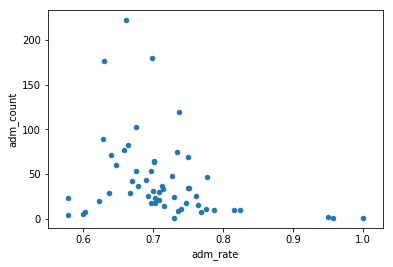

In [4]:
# avg admission rate
df_adm = df[['INSTNM', 'STABBR', 'ADM_RATE_ALL', 'OPENADMP']]
# adjust community colleges/open admission policy schools to have adm_rate of 100%
df_adm['ADM_RATE_WITH_OPADM'] = np.where(df_adm['OPENADMP'] == 1, 1, df_adm['ADM_RATE_ALL'])
# drop columns we don't need
df_adm2 = pd.DataFrame(df_adm[['STABBR', 'ADM_RATE_ALL', 'ADM_RATE_WITH_OPADM']])
df_adm2 = df_adm2.groupby(['STABBR']).agg(['mean', 'count'])
df_adm2.columns = [' '.join(col).strip() for col in df_adm2.columns.values]
df_adm2.rename(columns={"ADM_RATE_ALL mean": "adm_rate", "ADM_RATE_ALL count": "adm_count"}, inplace = True)
df_adm2.rename(columns={"ADM_RATE_WITH_OPADM mean": "adm_rate_opadm", "ADM_RATE_WITH_OPADM count": "adm_rate_count"}, inplace = True)
df_adm2 = df_adm2.sort_values(by=['adm_rate'])
#print(df_adm2)

df_adm2.plot.scatter(x='adm_rate', y='adm_count')


In [5]:
# plot COST x ADM RATE aggregated by state
#df_adm2['new'] = df_adm2['ADM_RATE_ALL mean']
df2 = df[['STABBR', 'ADM_RATE_ALL', "COSTT4_A"]]
df2 = df2.dropna()
df3 = df2.groupby(['STABBR']).agg(['mean'])

# try group by regions
# south atlantic
df3['region'] = 1
# northeast
# new england
df3.at[['CT', 'MA', 'NH', 'RI', 'VT', 'ME'], 'region'] = 2
# mid atlantic
df3.at[['NJ', 'NY', 'PA'], 'region'] = 2
# midwest
# east north central
df3.at[['IL', 'IN', 'MI', 'OH', 'WI'], 'region'] = 3
# west north central
df3.at[['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'], 'region'] = 3
# south
# south atlantic is default
# east south central
df3.at[['AL', 'KY', 'TN', 'MS'], 'region'] = 1
# west south central
df3.at[['TX', 'OK', 'AR', 'LA'], 'region'] = 1
# west
# mountain
df3.at[['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'], 'region'] = 4
# pacific
df3.at[['AK', 'CA', 'HI', 'OR', 'WA'], 'region'] = 4

# others
df3.at[['FM', 'GU', 'PR', 'VI'], 'region'] = 5

print(df3)

       ADM_RATE_ALL      COSTT4_A region
               mean          mean       
STABBR                                  
AK         0.578797  20102.500000      4
AL         0.679748  26424.718750      1
AR         0.702766  24772.652174      1
AZ         0.744697  28883.947368      4
CA         0.609487  38937.275591      4
CO         0.743276  29153.454545      4
CT         0.585359  40356.227273      2
DC         0.602861  45823.375000      1
DE         0.599971  30111.166667      1
FL         0.655699  31287.166667      1
FM         0.729076   7784.000000      5
GA         0.640335  28948.137931      1
GU         1.000000  21980.000000      5
HI         0.701785  22633.375000      4
IA         0.696443  35629.944444      3
ID         0.847223  24396.750000      4
IL         0.657597  35527.000000      3
IN         0.723922  33113.800000      3
KS         0.714821  29036.481481      3
KY         0.708533  30394.766667      1
LA         0.695952  24763.241379      1
MA         0.608

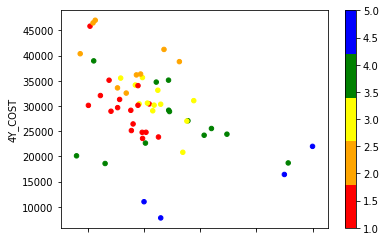

In [6]:
df3.columns = ['AVG_ADM', '4Y_COST', 'region']
labels = ['SA', 'NE', 'MA', 'ENC', 'WNC', 'ESC', 'WSC', 'MT', 'PA', 'OTR']
labels = [int(i % 23) for i in df3['region']]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
#print(colors)
df3.plot.scatter(x='AVG_ADM', y='4Y_COST', c=labels, cmap=matplotlib.colors.ListedColormap(colors))

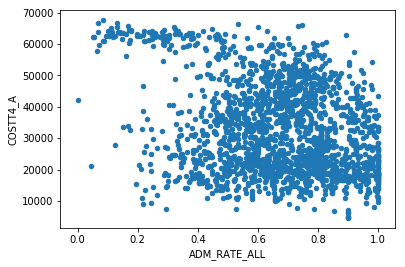

In [7]:
# plot COST x ADM RATE w/o aggregate by state
df2 = df[['STABBR', 'ADM_RATE_ALL', "COSTT4_A"]]
df2 = df2.dropna()
df2.plot.scatter(x='ADM_RATE_ALL', y= 'COSTT4_A')